

> Car Price Prediction





>

---

 Import Library







In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
plt.style.use('seaborn')

In [126]:
df = pd.read_csv('/content/car predication.csv')

Reading Data


In [ ]:
df

In [128]:
df.shape

(8128, 12)

.

Describe for numerical data

In [129]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


Exploratory Data Analysis (EDA)



In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


Check miss values

In [131]:
#missing values
df.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [ ]:
df.columns

In [142]:
print(f'This DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns.')

This DataSet Contains 8128 rows & 12 columns.


In [139]:
df.columns.to_list()

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage(km/ltr/kg)',
 'engine',
 'max_power',
 'seats']

In [137]:
for feature in df:
    print(f'> {feature} has {len(df[feature].unique())} unique values')

> name has 2058 unique values
> year has 29 unique values
> selling_price has 677 unique values
> km_driven has 921 unique values
> fuel has 4 unique values
> seller_type has 3 unique values
> transmission has 2 unique values
> owner has 5 unique values
> mileage(km/ltr/kg) has 382 unique values
> engine has 122 unique values
> max_power has 321 unique values
> seats has 10 unique values


Information about data



In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [ ]:
pip install sweetviz

In [134]:
import sweetviz as sv

In [135]:
sweet_report = sv.analyze(df)


                                             |          | [  0%]   00:00 -> (? left)

report


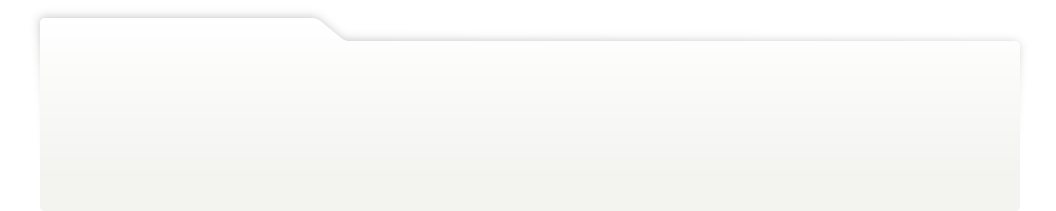
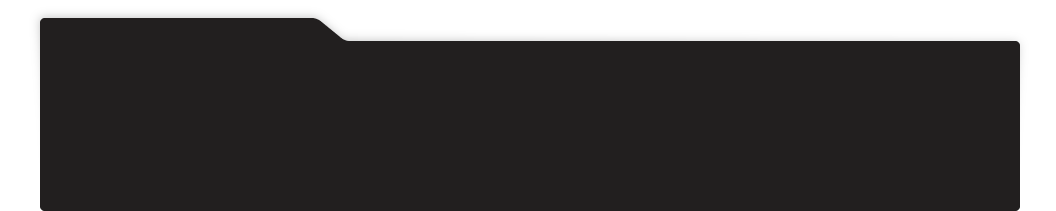
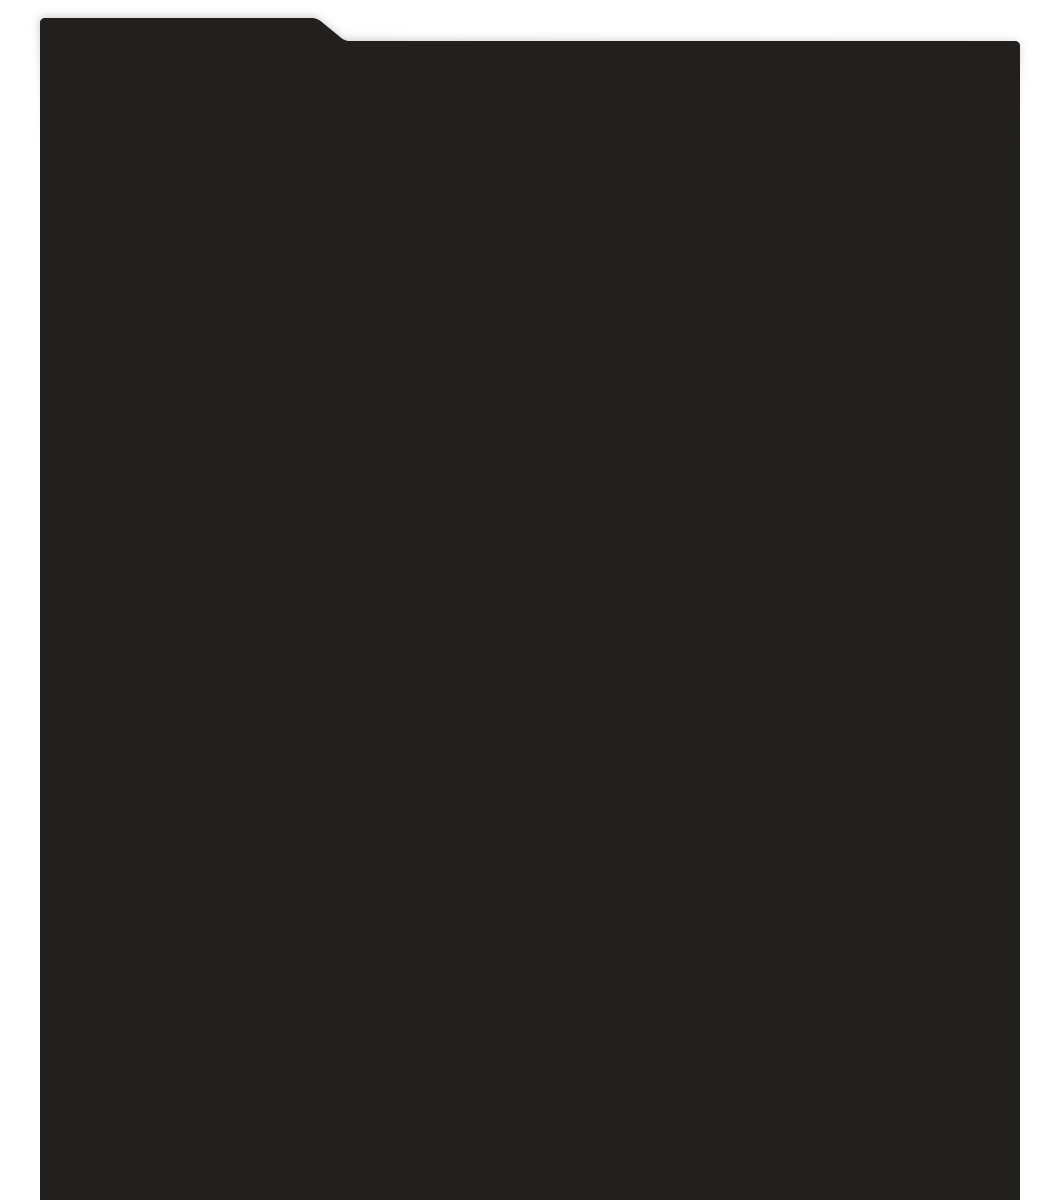
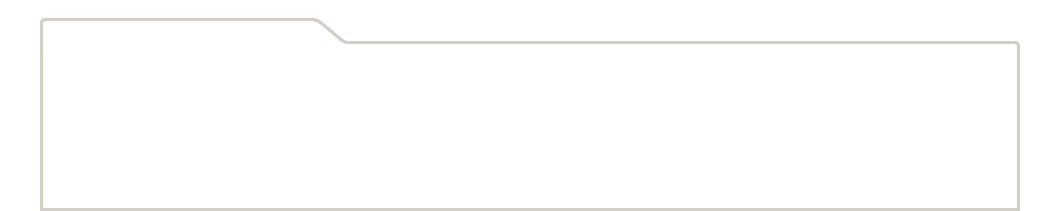
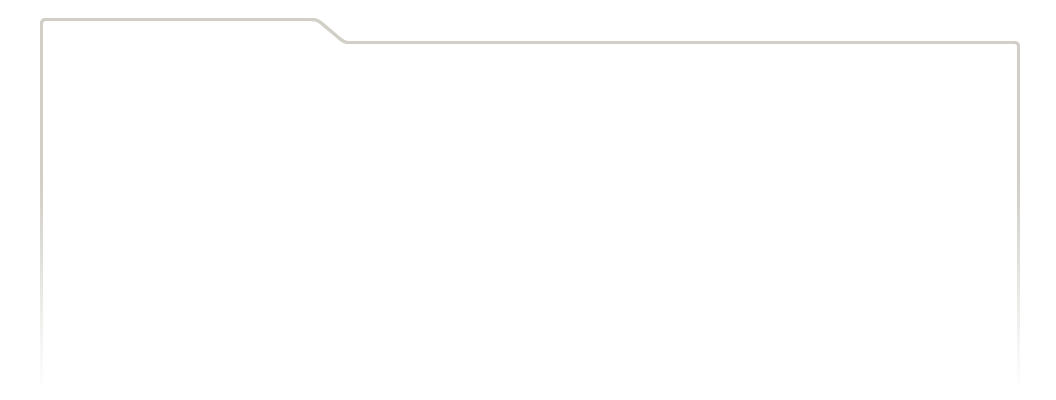
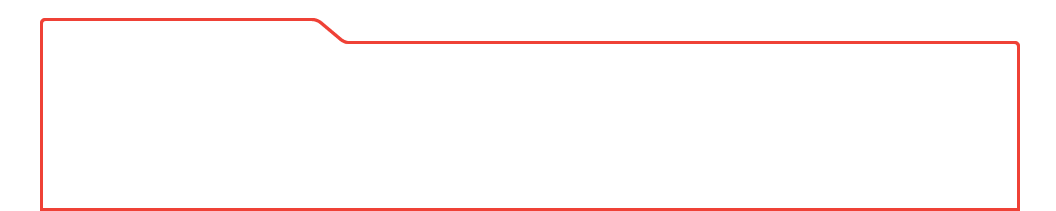
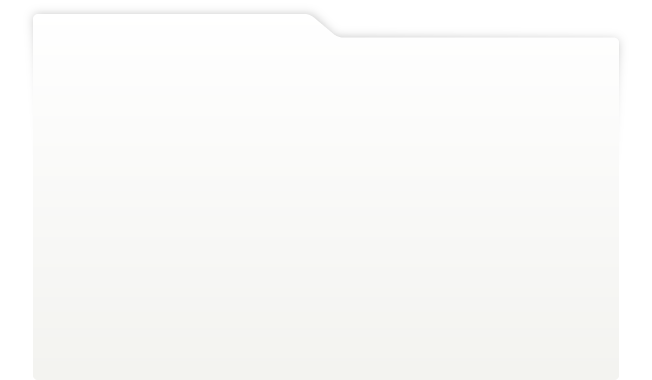
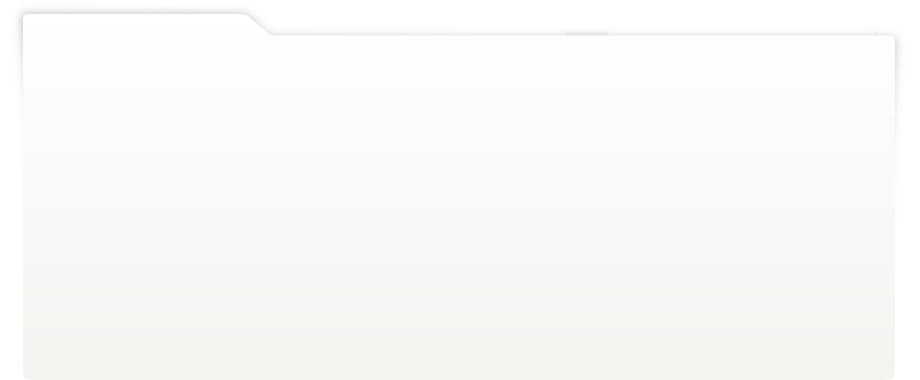
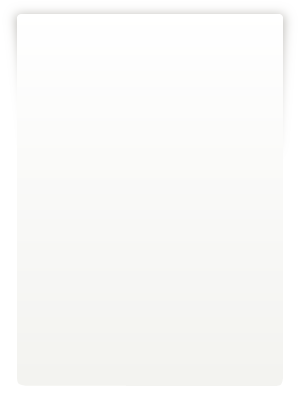
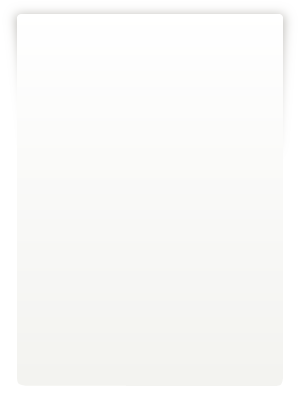
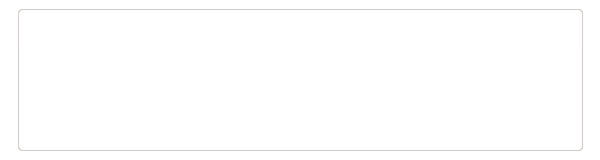
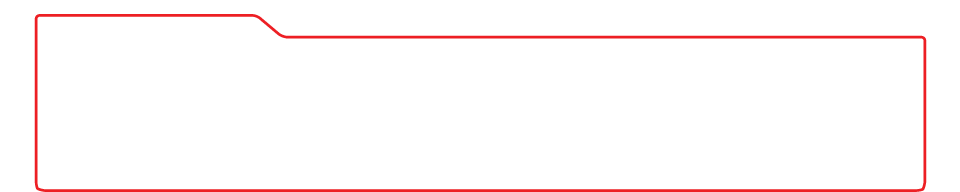
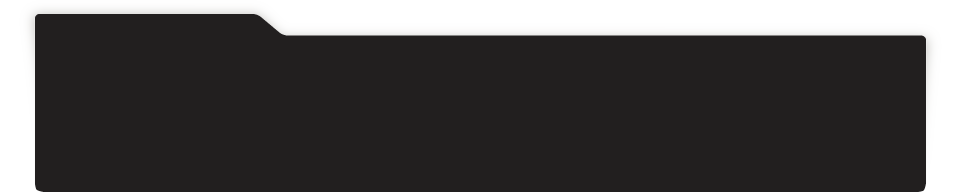
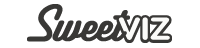
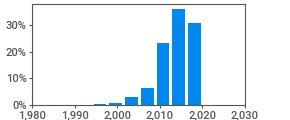
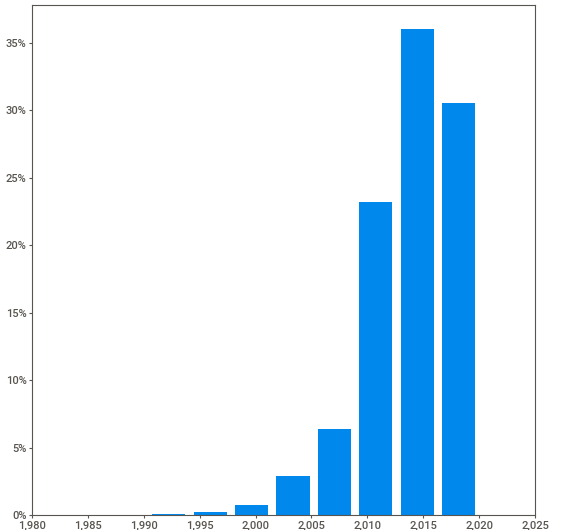
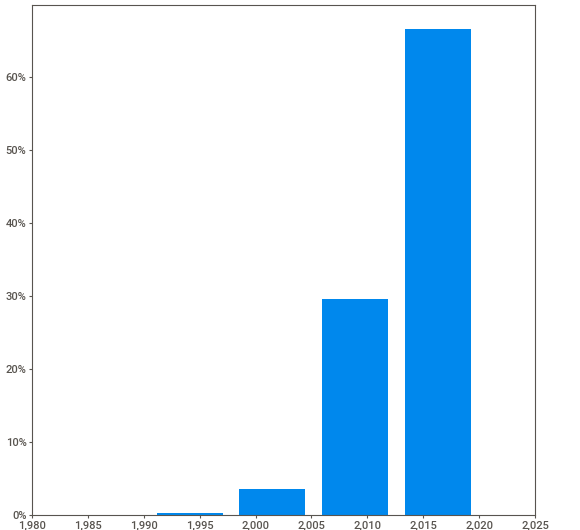
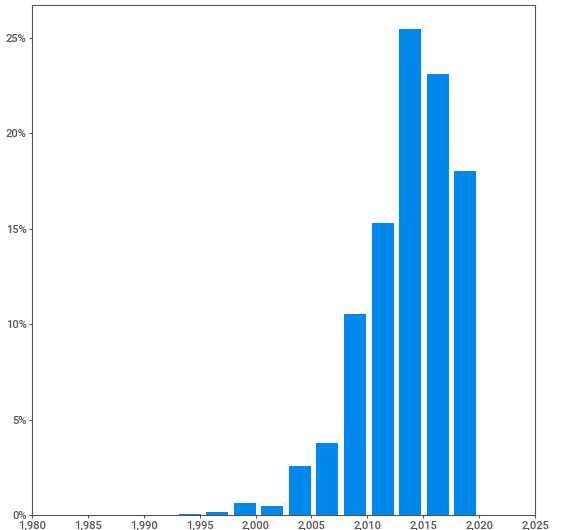
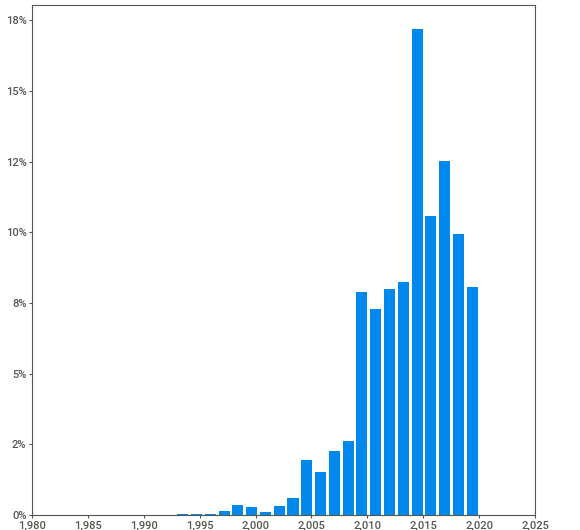
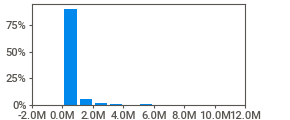
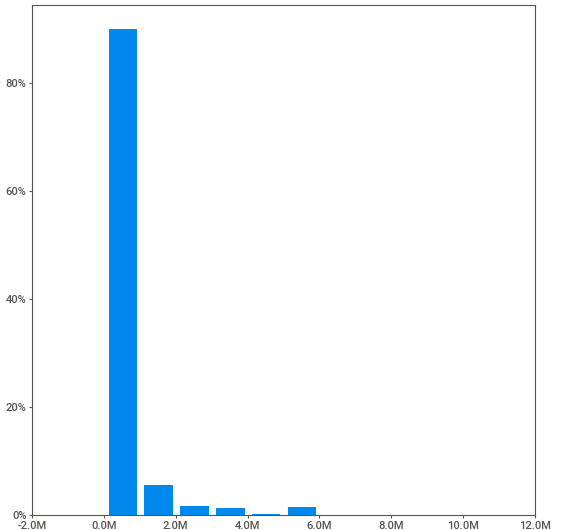
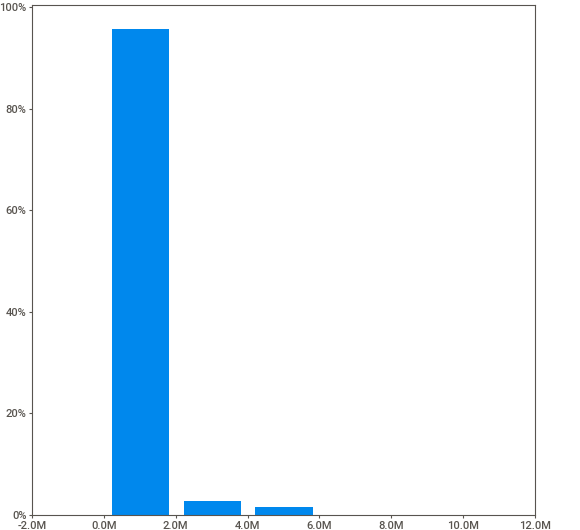
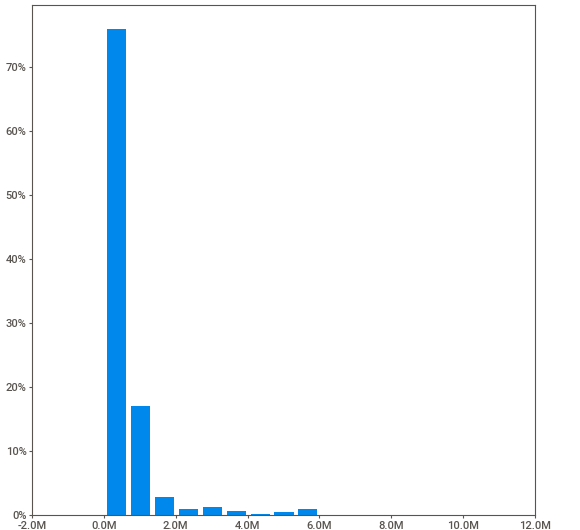
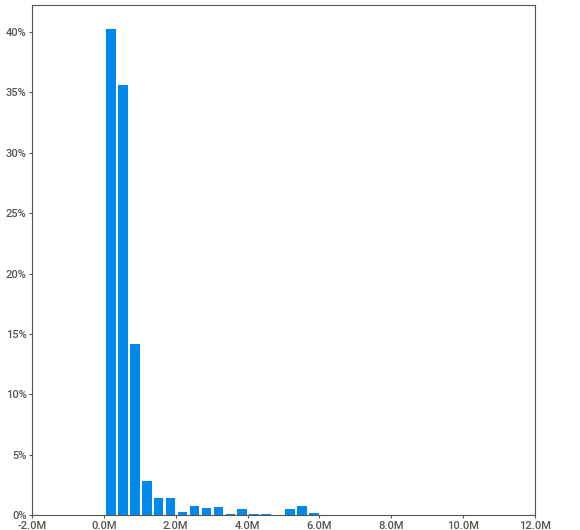
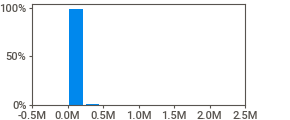
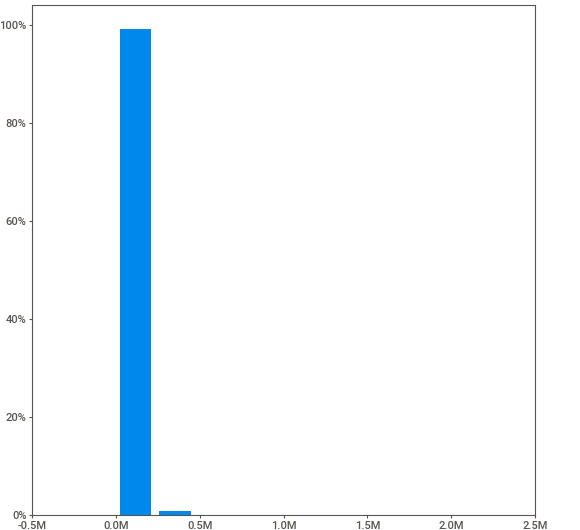
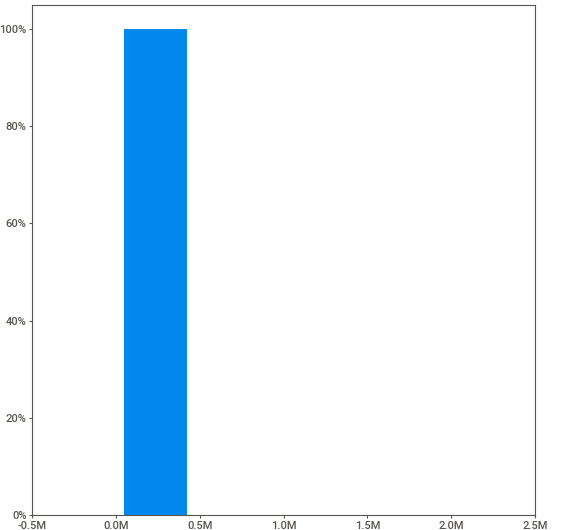
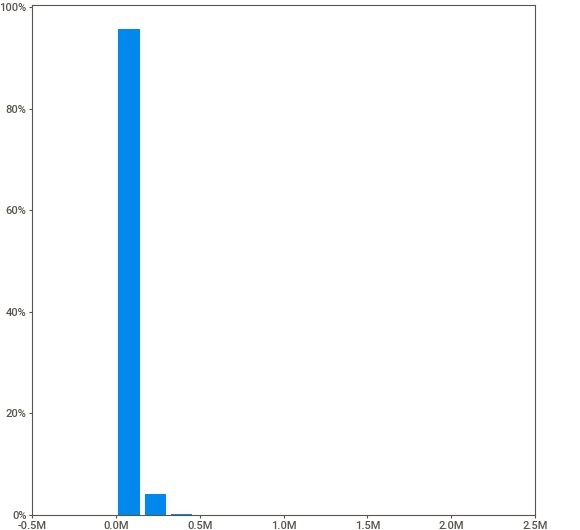
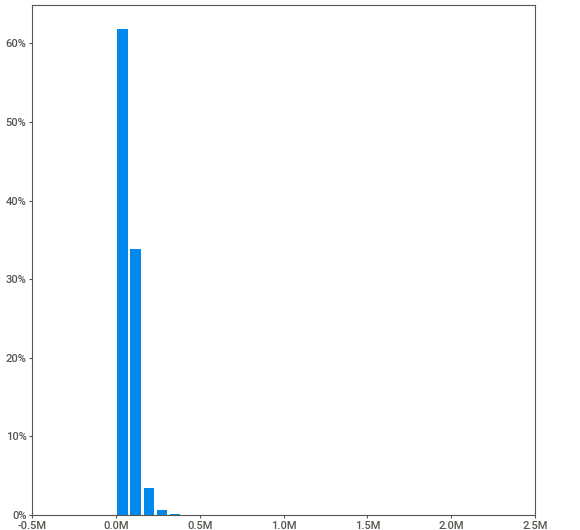
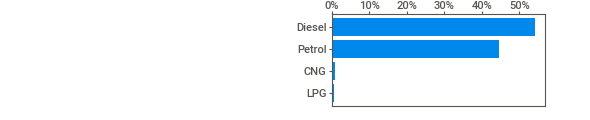
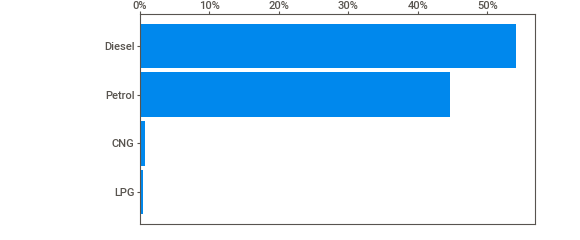
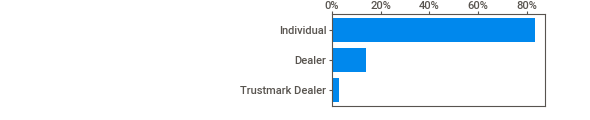
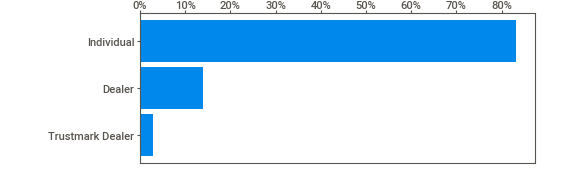
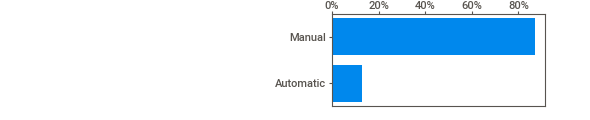
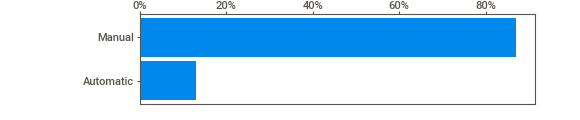
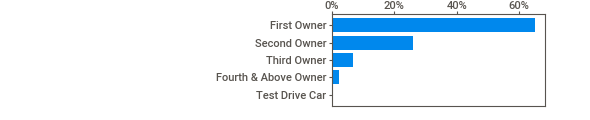
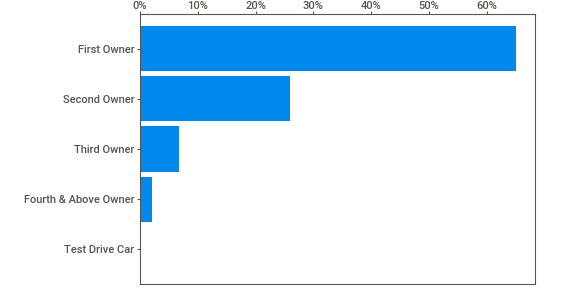
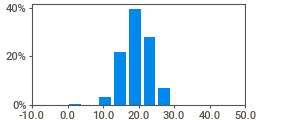
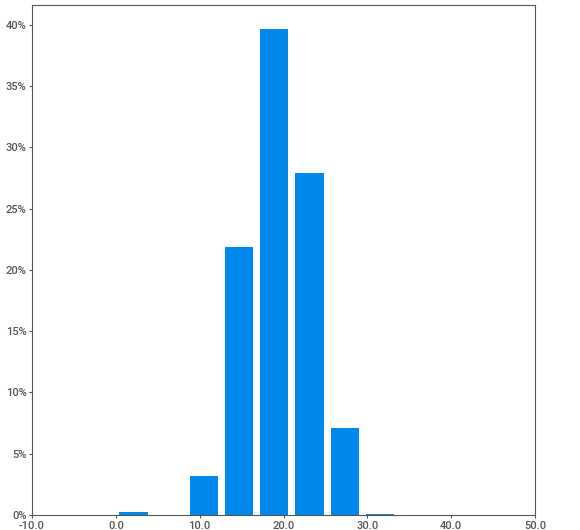
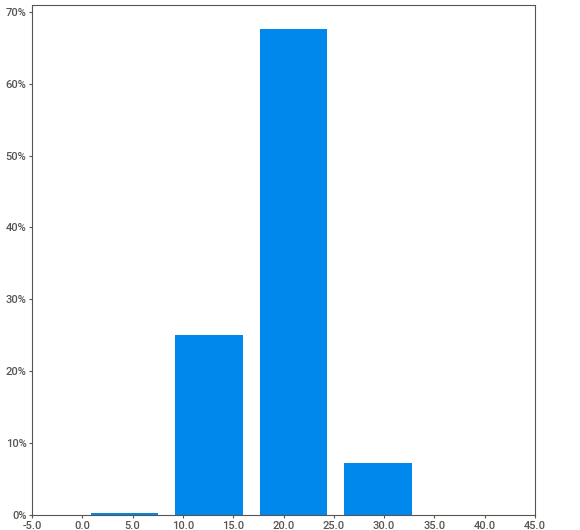
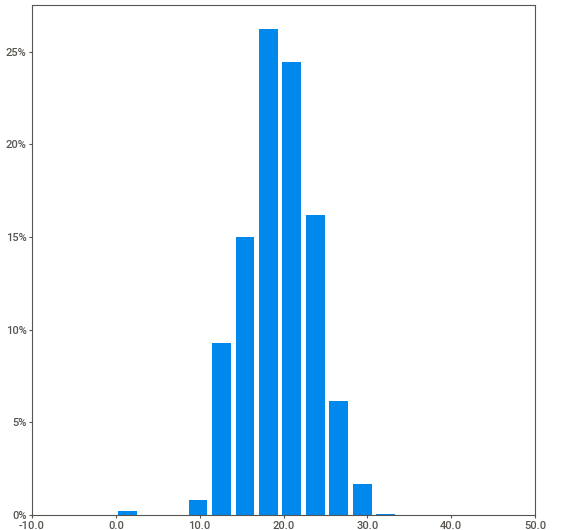
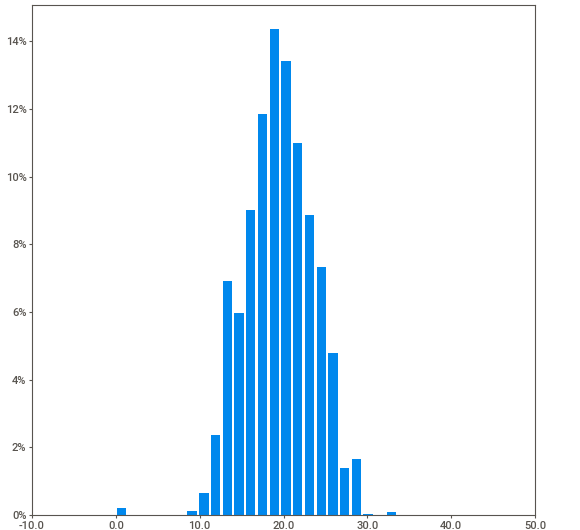
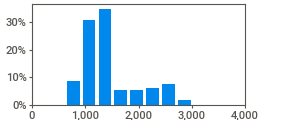
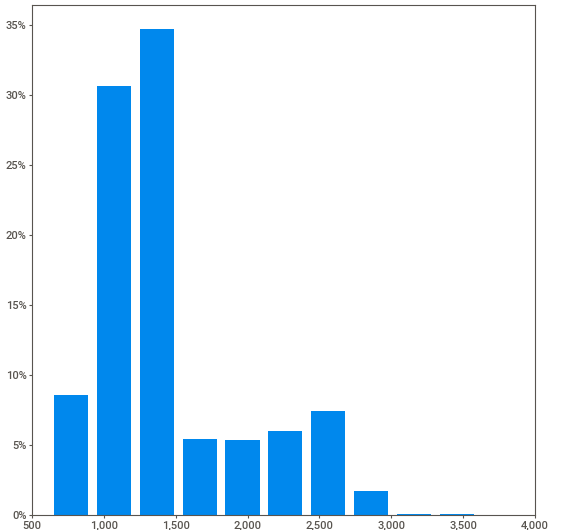
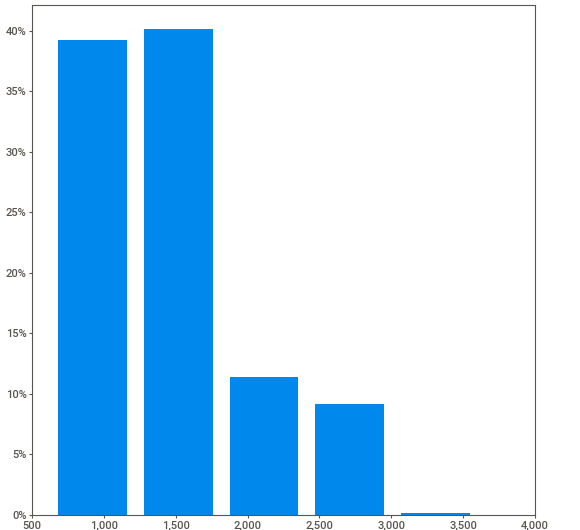
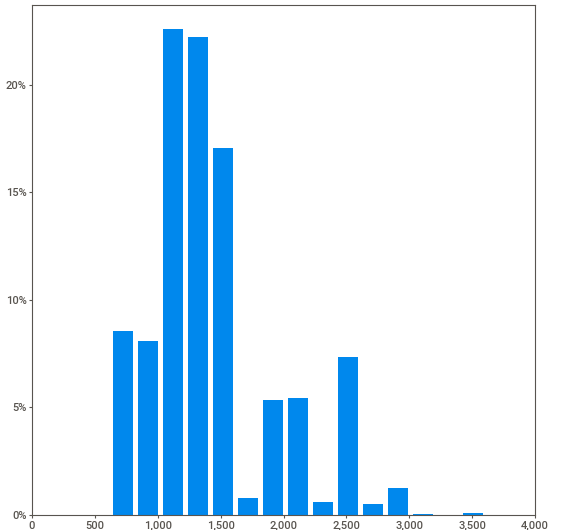
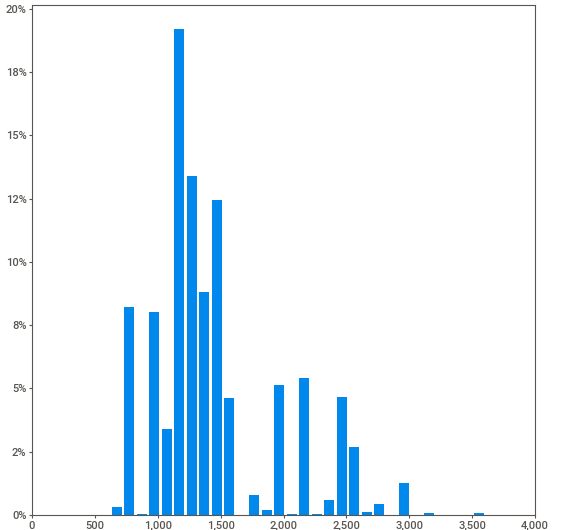
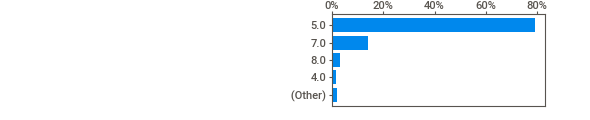
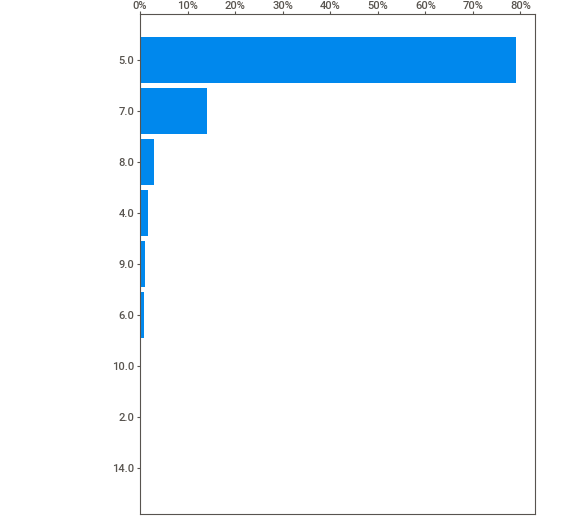
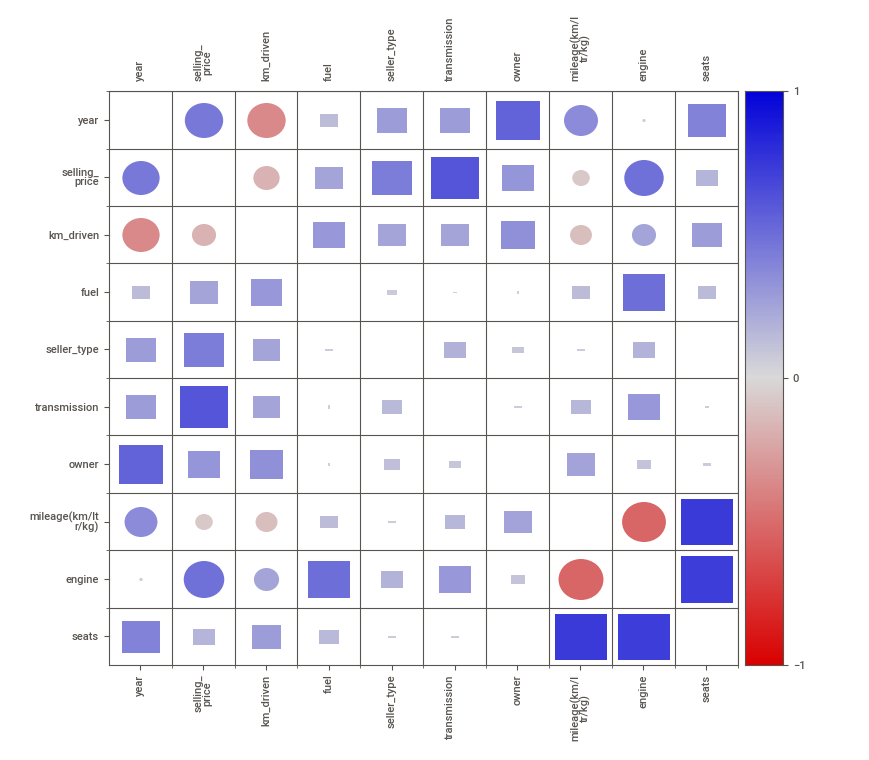
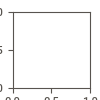

In [143]:
sweet_report.show_notebook(layout='widescreen', w=1500, h=600, scale=0.8)

seaborn heatmap

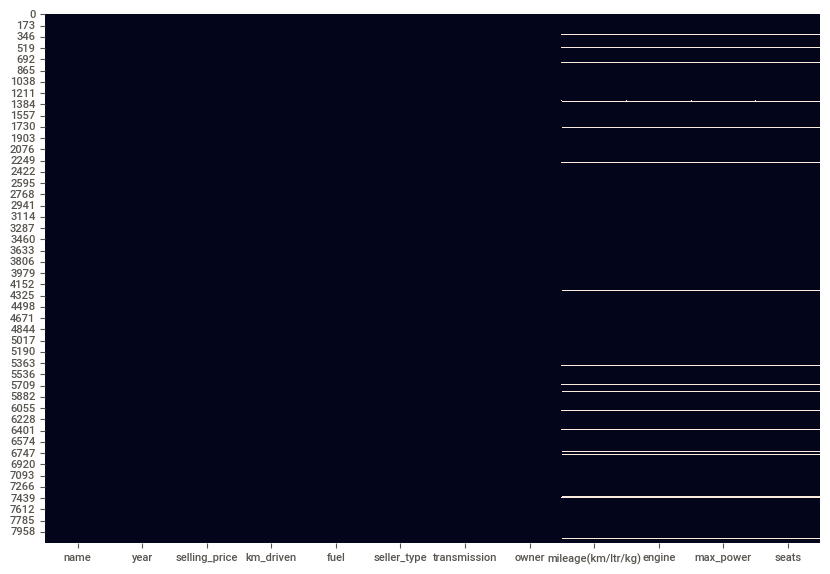

In [144]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isna(),annot=False,cbar=False)
plt.show()

In [145]:
#finding missing values
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

Dealing with Outliers


In [156]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [146]:
# standardizing column names by removing space
df.columns = df.columns.str.replace(' ','_')

In [147]:
df.columns.to_list()

['name',
 'year',
 'selling_price',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage(km/ltr/kg)',
 'engine',
 'max_power',
 'seats']

In [148]:
#Count of duplicated rows
df[df.duplicated()].shape

(1202, 12)

duplicated rows

In [149]:
#Print the duplicated rows
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.8,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177,5.0
387,Skoda Rapid 1.6 MPI AT Elegance,2016,645000,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.5,5.0
409,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177,5.0
410,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,5.0
411,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177,5.0
412,Tata Safari Storme EX,2015,503000,110000,Diesel,Individual,Manual,First Owner,14.10,2179.0,147.94,7.0


In [150]:
#checking duplicates
df.duplicated().sum()

1202

In [151]:
df.drop_duplicates(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6926.0,2013.420300,4.078286,1983.0,2011.0,2014.00,2017.0,2020.0
selling_price,6926.0,517270.678458,519766.985985,29999.0,250000.0,400000.00,633500.0,10000000.0
km_driven,6926.0,73995.676437,58358.095175,1.0,40000.0,70000.00,100000.0,2360457.0
mileage(km/ltr/kg),6718.0,19.465310,4.049150,0.0,16.8,19.44,22.5,42.0
engine,6718.0,1430.891337,493.493277,624.0,1197.0,1248.00,1498.0,3604.0
seats,6718.0,5.434653,0.984230,2.0,5.0,5.00,5.0,14.0


In [152]:
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(cat_feature)

['name', 'fuel', 'seller_type', 'transmission', 'owner', 'max_power']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


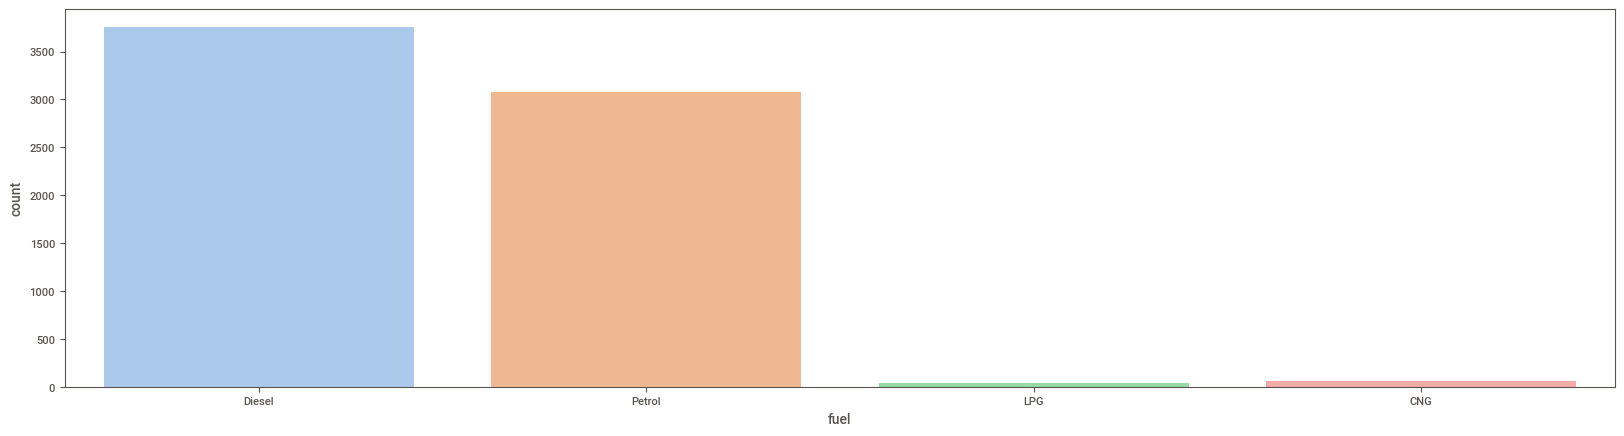

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


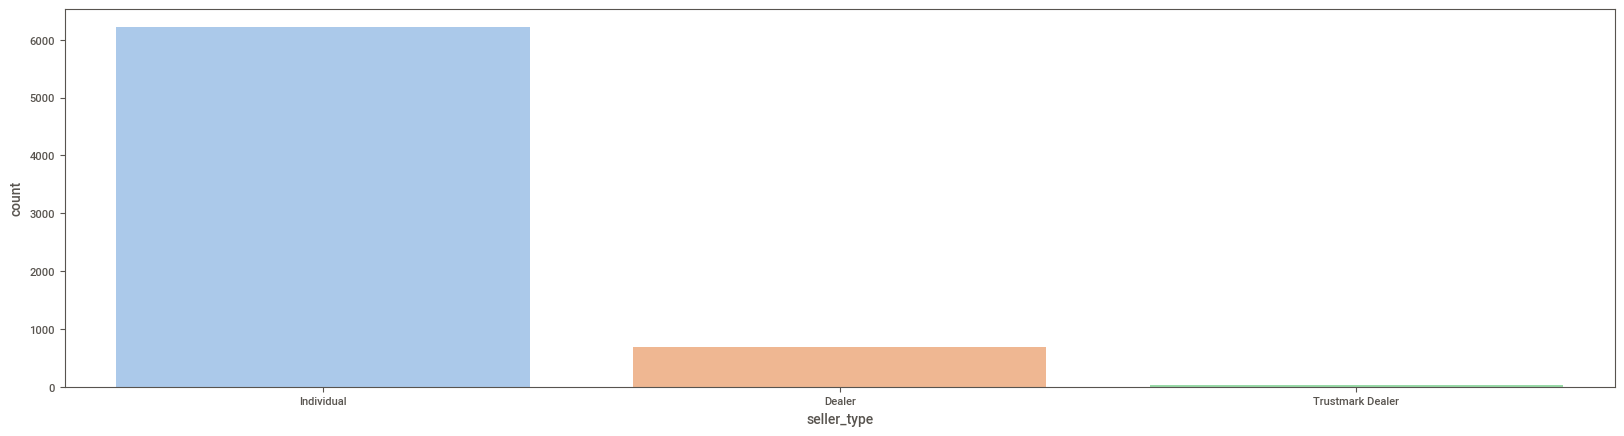

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


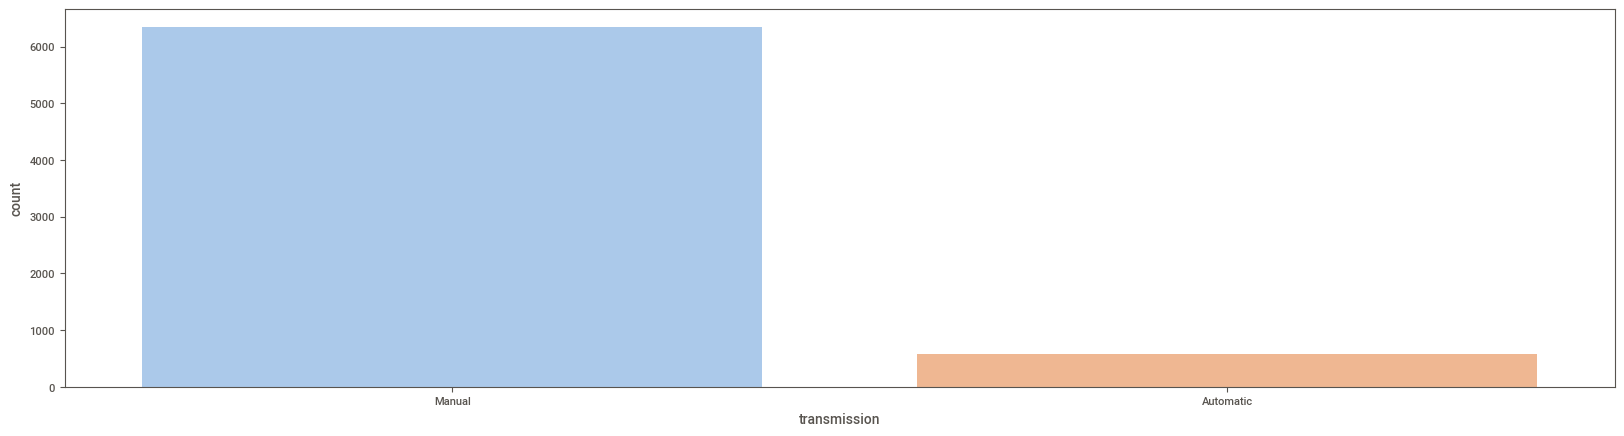

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


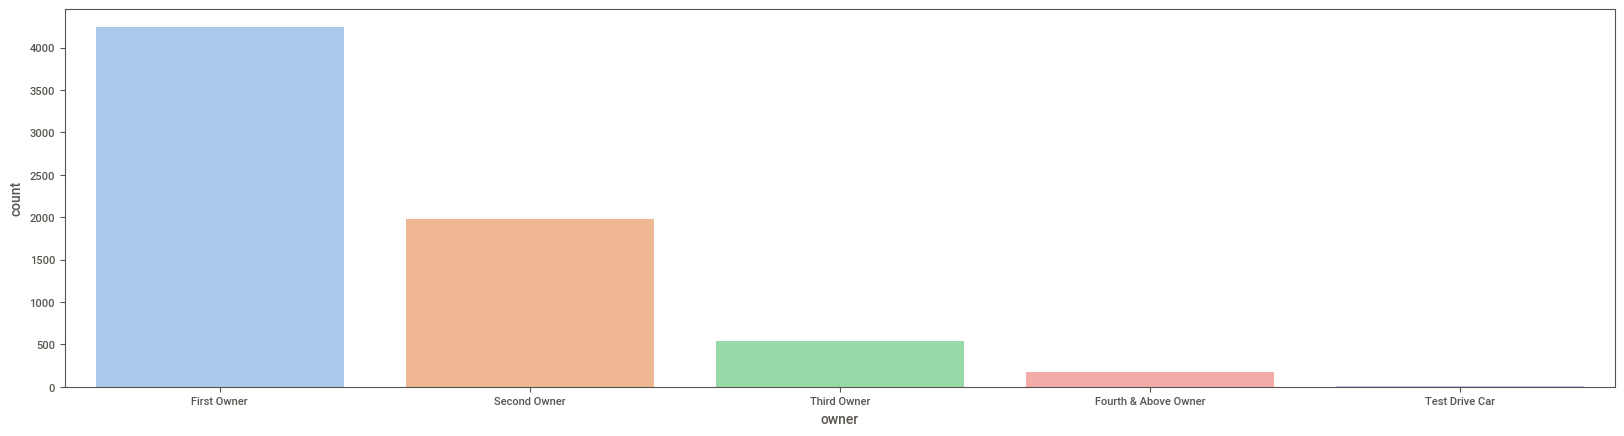

In [153]:
cat_feature1=[feature for feature in cat_feature if len(df[feature].unique())<50]
for feature in cat_feature1 :
    plt.figure(figsize = (20, 5))
    sns.countplot(df[feature],palette="pastel")
    plt.show()

Correlation Matrix'

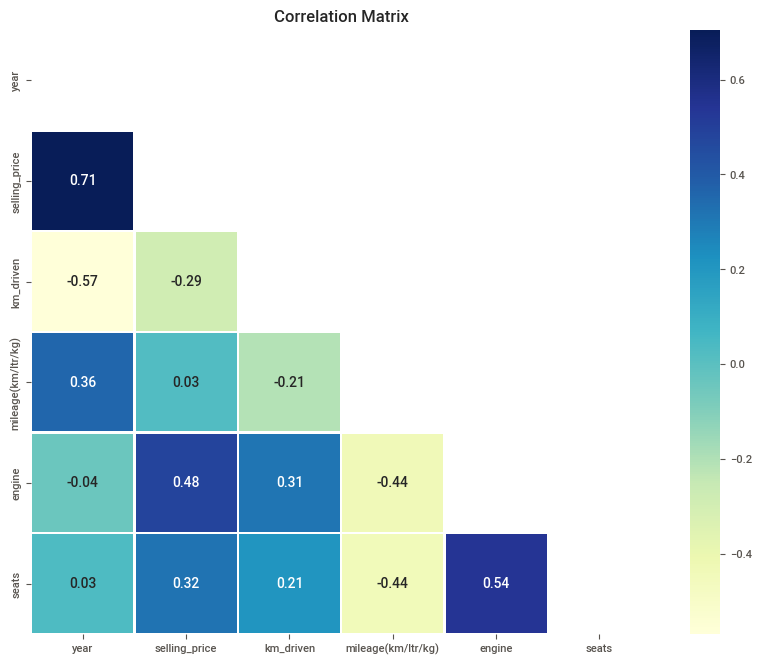

In [154]:
plt.figure(figsize = (10, 8))
corr = df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()